In [18]:
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('twitter_training.csv')  # Replace with your dataset path

# Display basic information
print(df.info())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None
   Tweet ID       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet Content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [2]:
print("Available columns:", df.columns)

Available columns: Index(['Tweet ID', 'entity', 'sentiment', 'Tweet Content'], dtype='object')


In [3]:

# Drop rows with missing values
df.dropna(inplace=True)

# Function to clean tweet text
def clean_text(text):
    text = str(text)  # Convert anything to string
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower().strip()          # Convert to lowercase and strip whitespace
    return text

# Apply text cleaning
df['Cleaned_Tweet'] = df['Tweet ID'].apply(clean_text)


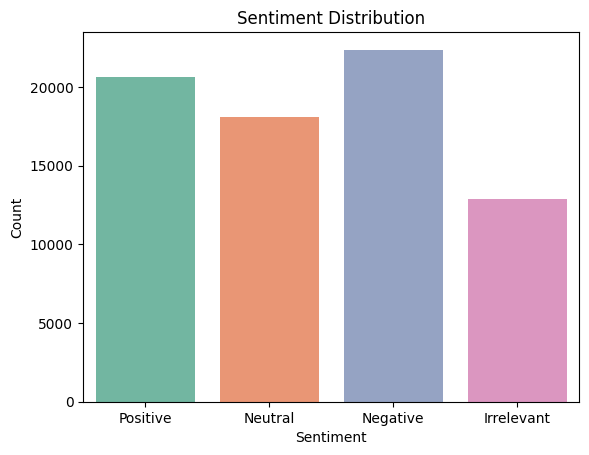

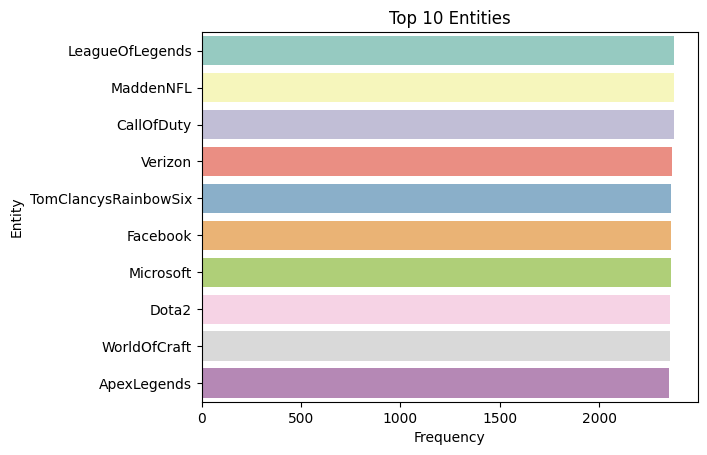

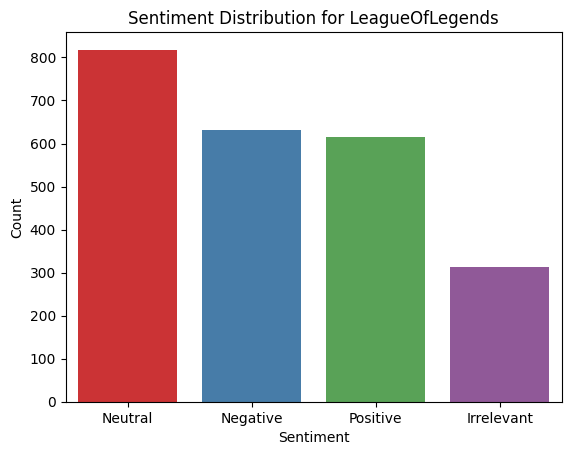

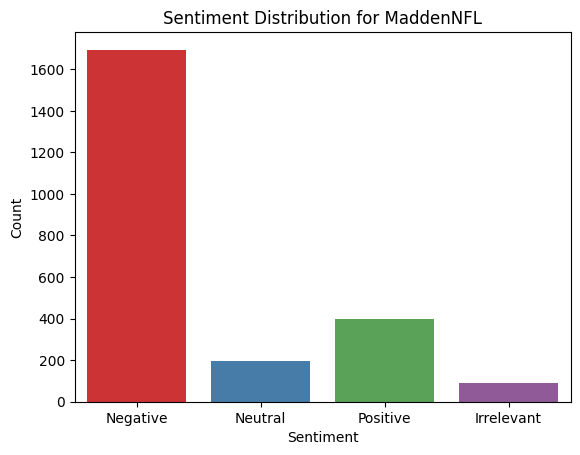

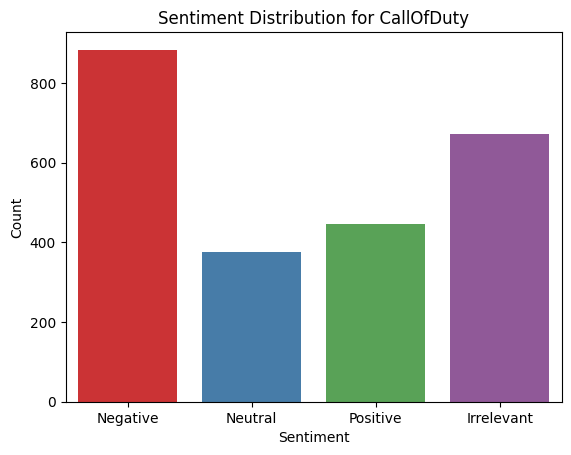

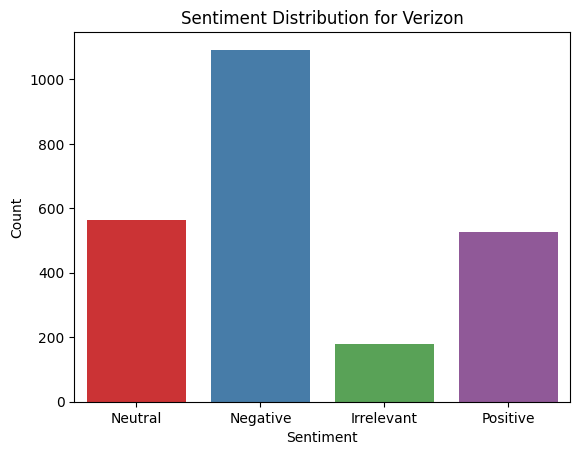

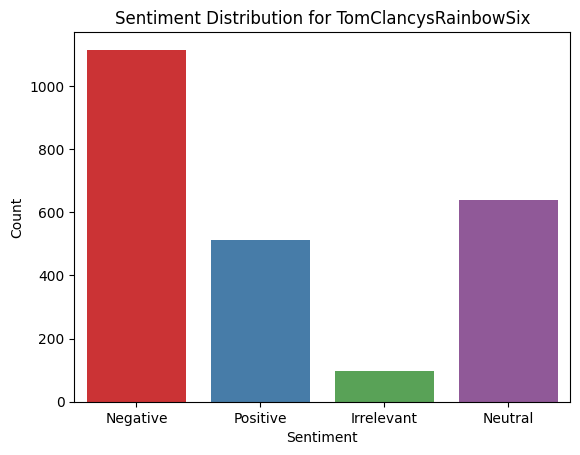

In [7]:
# Plot sentiment distribution
sns.countplot(data=df, x='sentiment', hue='sentiment', palette='Set2', legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Top 10 entities by frequency
top_entities = df['entity'].value_counts().nlargest(10)
sns.barplot(x=top_entities.values, y=top_entities.index, hue=top_entities.index, palette='Set3', legend=False)
plt.title('Top 10 Entities')
plt.xlabel('Frequency')
plt.ylabel('Entity')
plt.show()

# Sentiment distribution for top 5 entities
top5_entities = top_entities.index[:5]
for entity in top5_entities:
    subset = df[df['entity'] == entity]
    sns.countplot(data=subset, x='sentiment', hue='sentiment', palette='Set1', legend=False)
    plt.title(f'Sentiment Distribution for {entity}')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()


In [ ]:
import re
import numpy as np

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|@\w+|#\w+", '', text)       # Remove URLs, mentions, hashtags
    text = re.sub(r"[^A-Za-z\s]", '', text)             # Remove special characters
    text = text.lower().strip()                         #convert to lowercase and strip whitespace
    return text if text else np.nan

df['Cleaned_Tweet'] = df['Tweet Content'].apply(clean_text)
df = df.dropna(subset=['Cleaned_Tweet'])  # Drop rows with empty cleaned tweets


In [ ]:
print(df['Cleaned_Tweet'].sample(5))

31371                               check out my portfolio
12974    nk  beluba  ronk why my playshot is open but b...
71600    the live stream was amazing i really enjoyed t...
56076                                            tkers smh
64910                maddenleagueops  maddenndirect is sad
Name: Cleaned_Tweet, dtype: object


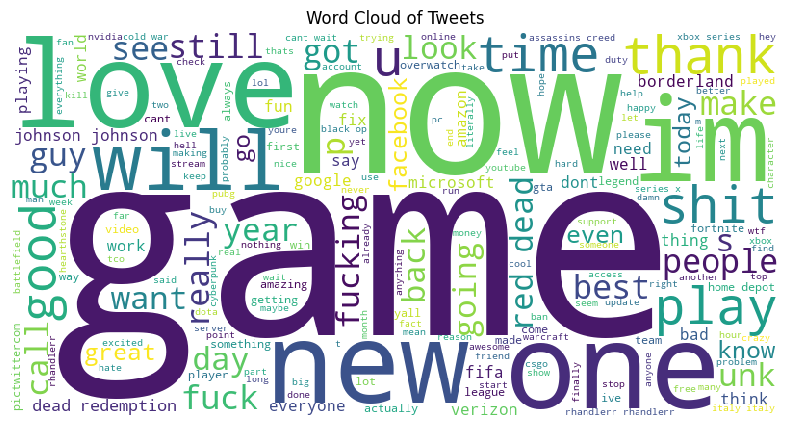

In [25]:
text = ' '.join(df['Cleaned_Tweet'])

if text.strip():  # Ensure it's not empty
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='nearest')
    plt.axis('off')
    plt.title("Word Cloud of Tweets")
    plt.show()
else:
    print("❌ No valid text found in 'Cleaned_Tweet' to generate a word cloud.")
